In [1]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt

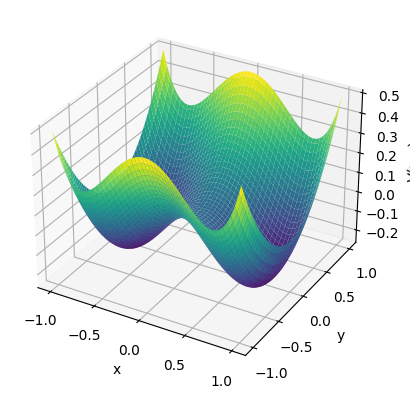

In [2]:
dt = 0.01 # time step
steps = 1000 # number of steps

# Initial conditions
p = np.zeros((steps, 2))
q = np.zeros((steps, 2))

# Parameters of the system
a = 1.0
b = 1.0
c = 0.5

# Initial conditions
p[0] = [0.0, 0.0]
q[0] = [1.0, 0.0]

# Hamiltonian definitions
def V(qx, qy):
    return a*qx**4 - b*qx**2 + c*qy**2

def dHdqx(qx):
    return 4*a*qx**3 - 2*b*qx

def dHdqy(qy):
    return 2*c*qy

def dHdpx(px, m=1.0):
    return px/m

def dHdpy(py, m=1.0):
    return py/m

dHdp = np.array([dHdpx, dHdpy])
dHdq = np.array([dHdqx, dHdqy])

# Plot the potential in 3-dimensional space
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = V(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
plt.show()

(1, 2, 1000, 2)


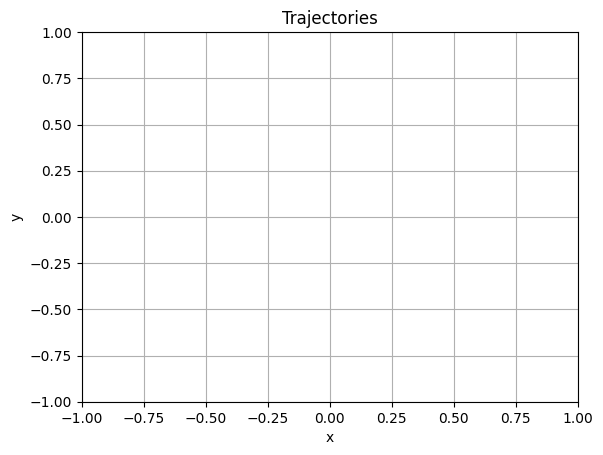

In [29]:
trajectories_raw = np.array([lb.symplectic_euler([np.random.randn()*2-1, np.random.randn()*2-1], [np.random.randn()*2-1, np.random.randn()*2-1], 2, dHdp, dHdq, steps, dt) for _ in range(1)])

q_trajs = trajectories_raw[:][0]
p_trajs = trajectories_raw[:][1]
print(q_trajs.shape)

# Plot the trajectories
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title('Trajectories')
ax.grid(True)


plt.show()
